In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_reviews_dataset.csv')
df.head()

,review_text,rating,review_date,variant,feedback
0,This product is amazing,4,2024-01-30,Black,This product is amazing
1,Poor quality and bad experience,2,2024-01-25,Red,Poor quality and bad experience
2,Great value for money,4,2022-03-31,Silver,Great value for money
3,Very disappointed with this product,1,2022-08-12,Blue,Very disappointed with this product
4,This product is amazing,4,2023-07-29,Blue,This product is amazing


In [3]:
len(df)

3000

In [5]:
df.describe()

,rating
count,3000.000000
mean,3.423000
std,1.287617
min,1.000000
25%,2.000000
50%,4.000000
75%,4.000000
max,5.000000


In [6]:
df['rating'].value_counts()

rating
4    871
5    740
3    605
2    486
1    298
Name: count, dtype: int64

<Axes: xlabel='rating'>

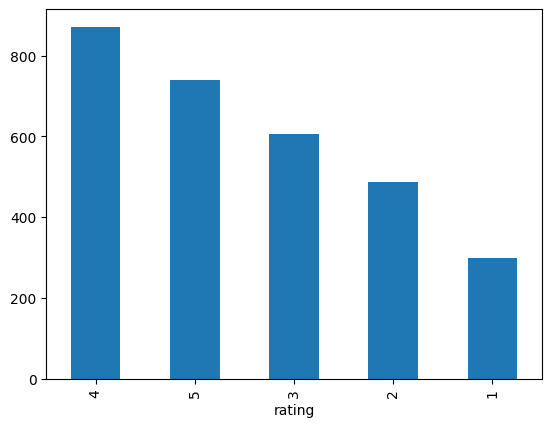

In [7]:
df['rating'].value_counts().plot(kind = 'bar')

In [8]:
df['review_length'] = df['review_text'].apply(len)

In [9]:
df.head()

,review_text,rating,review_date,variant,feedback,review_length
0,This product is amazing,4,2024-01-30,Black,This product is amazing,23
1,Poor quality and bad experience,2,2024-01-25,Red,Poor quality and bad experience,31
2,Great value for money,4,2022-03-31,Silver,Great value for money,21
3,Very disappointed with this product,1,2022-08-12,Blue,Very disappointed with this product,35
4,This product is amazing,4,2023-07-29,Blue,This product is amazing,23


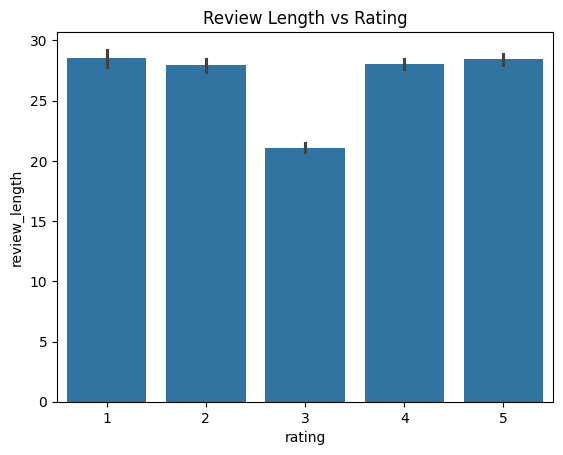

In [10]:
plt.figure()
sns.barplot(x = "rating", y = "review_length", data = df)
plt.title("Review Length vs Rating")
plt.show()

In [11]:
df['review_length'].max()

39

In [12]:
df.head(1)

,review_text,rating,review_date,variant,feedback,review_length
0,This product is amazing,4,2024-01-30,Black,This product is amazing,23


In [13]:
X = df["review_text"]
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
model = Pipeline([
    ("tfidf", TfidfVectorizer(
        stop_words="english",
        ngram_range=(1,2),
        max_features=5000
    )), 
    ("classifier", LogisticRegression(
        max_iter=1000
    ))
])

In [15]:
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('classifier', LogisticRegression(max_iter=1000))])

In [16]:
model.classes_

array([1, 2, 3, 4, 5], dtype=int64)

In [18]:
y_preds = model.predict(X_test)

In [20]:
print("Accuracy Score: ", accuracy_score(y_test, y_preds))
print("classification_report: ", classification_report(y_test, y_preds))
print("confusion_matrix: ", confusion_matrix(y_test, y_preds))

Accuracy Score:  0.6483333333333333
classification_report:                precision    recall  f1-score   support

           1       0.00      0.00      0.00        60
           2       0.62      1.00      0.76        97
           3       1.00      1.00      1.00       121
           4       0.54      0.86      0.67       174
           5       0.47      0.14      0.22       148

    accuracy                           0.65       600
   macro avg       0.53      0.60      0.53       600
weighted avg       0.57      0.65      0.57       600

confusion_matrix:  [[  0  60   0   0   0]
 [  0  97   0   0   0]
 [  0   0 121   0   0]
 [  0   0   0 150  24]
 [  0   0   0 127  21]]


e:\ML Projects\Autogen-AgentAI\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\ML Projects\Autogen-AgentAI\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\ML Projects\Autogen-AgentAI\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


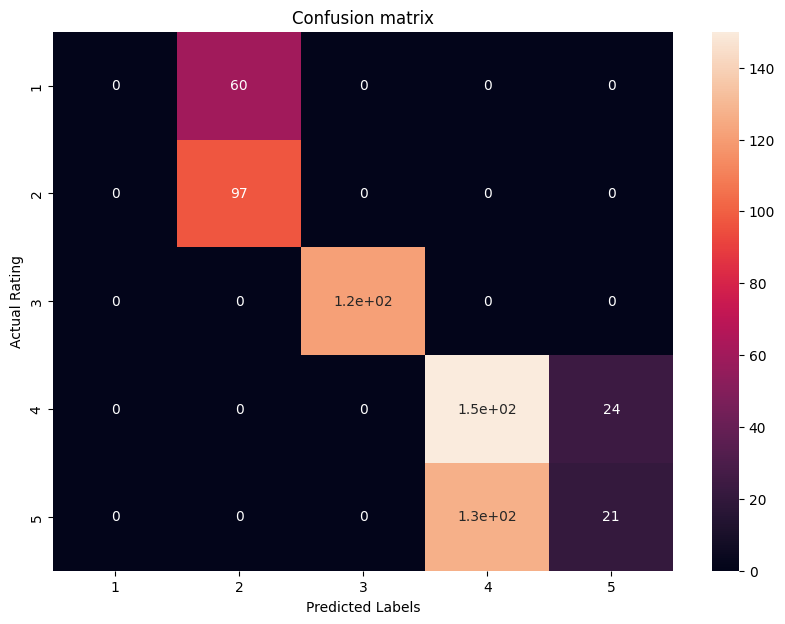

In [29]:
labels = [1,2,3,4,5]
cm = confusion_matrix(y_test, y_preds, labels = labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True,xticklabels=labels,yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Rating")
plt.title("Confusion matrix")
plt.show()

In [27]:
new_reviews = [
    "Absolutely amazing product, works perfectly",
    "The product is okay, nothing special",
    "Very bad experience, waste of money"
]

model.predict(new_reviews)

array([4, 3, 2], dtype=int64)